In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from rtb.datasets.forum import ForumDataset

ds = ForumDataset(root="../../data", process=False, download=False)

loading table ../../data/rtb-forum/processed/db/users.parquet...
done in 0.07 seconds.
loading table ../../data/rtb-forum/processed/db/postHistory.parquet...
done in 1.24 seconds.
loading table ../../data/rtb-forum/processed/db/votes.parquet...
done in 0.07 seconds.
loading table ../../data/rtb-forum/processed/db/comments.parquet...
done in 0.38 seconds.
loading table ../../data/rtb-forum/processed/db/postLinks.parquet...
done in 0.01 seconds.
loading table ../../data/rtb-forum/processed/db/posts.parquet...
done in 0.72 seconds.
loading table ../../data/rtb-forum/processed/db/badges.parquet...
done in 0.04 seconds.


In [2]:
for i, j in ds._db.tables.items():
    print("table", i, ", len: ", str(len(j)))

table users , len:  40325
table postHistory , len:  303187
table votes , len:  328064
table comments , len:  174305
table postLinks , len:  11102
table posts , len:  91976
table badges , len:  79851


In [3]:
for name, table in ds._db.tables.items():
    print(name)
    df = table.df
    df["year"] = df[table.time_col].dt.year
    print(df.year.value_counts())

users
year
2014    14442
2013    12231
2012     7544
2011     4430
2010     1678
Name: count, dtype: int64
postHistory
year
2013    92826
2014    88488
2012    66528
2011    41648
2010    13673
2009       24
Name: count, dtype: int64
votes
year
2013    90044
2014    82768
2012    79741
2011    53370
2010    22070
2009       71
Name: count, dtype: int64
comments
year
2013    52074
2014    47358
2012    42403
2011    24638
2010     7804
2009       28
Name: count, dtype: int64
postLinks
year
2014    3911
2013    3622
2012    2255
2011    1059
2010     255
Name: count, dtype: int64
posts
year
2013    26771
2014    26461
2012    20113
2011    13163
2010     5450
2009       18
Name: count, dtype: int64
badges
year
2014    24931
2013    24718
2012    16926
2011     9327
2010     3949
Name: count, dtype: int64


In [5]:
task_name = "UserNumPostsTask"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('90 days 00:00:00')

In [6]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [7]:
train_table.df.sort_values(["OwnerUserId", "window_min_time"]).head(20)

,OwnerUserId,window_min_time,window_max_time,num_posts
0,0,2010-09-30,2010-12-29,0
0,0,2010-12-29,2011-03-29,2
0,0,2011-03-29,2011-06-27,7
0,0,2011-06-27,2011-09-25,2
0,0,2011-09-25,2011-12-24,4
0,0,2011-12-24,2012-03-23,20
0,0,2012-03-23,2012-06-21,26
0,0,2012-06-21,2012-09-19,17
0,0,2012-09-19,2012-12-18,38
0,0,2012-12-18,2013-03-18,16


In [14]:
test_table.df

,window_min_time,window_max_time,OwnerUserId
0,2014-03-14,2014-06-12,0
1,2014-03-14,2014-06-12,1
2,2014-03-14,2014-06-12,2
3,2014-03-14,2014-06-12,3
4,2014-03-14,2014-06-12,4
...,...,...,...
29605,2014-03-14,2014-06-12,29605
29606,2014-03-14,2014-06-12,29941
29607,2014-03-14,2014-06-12,31581
29608,2014-03-14,2014-06-12,32657


In [11]:
ds._db.tables["users"].df

,Id,Reputation,CreationDate,DisplayName,WebsiteUrl,Location,AboutMe,AccountId,Age,ProfileImageUrl
0,0,1,2010-07-19 06:55:26,Community,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1,NaN,NaN
1,1,101,2010-07-19 14:01:36,Geoff Dalgas,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the StackOverflow team. Find ...,2,37.0,NaN
2,2,101,2010-07-19 15:34:50,Jarrod Dixon,http://stackoverflow.com,"New York, NY","<p><a href=""http://blog.stackoverflow.com/2009...",3,35.0,NaN
3,3,101,2010-07-19 19:03:27,Emmett,http://minesweeperonline.com,"San Francisco, CA",<p>currently at a startup in SF</p>\n\n<p>form...,1998,28.0,http://i.stack.imgur.com/d1oHX.jpg
4,4,6792,2010-07-19 19:03:57,Shane,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,54503,35.0,NaN
...,...,...,...,...,...,...,...,...,...,...
40320,40320,1,2014-09-13 21:03:50,AussieMeg,NaN,NaN,NaN,5026902,NaN,http://graph.facebook.com/665821703/picture?ty...
40321,40321,6,2014-09-13 21:39:30,Mia Maria,NaN,NaN,NaN,5026998,NaN,NaN
40322,40322,101,2014-09-13 23:45:27,tronbabylove,NaN,United States,NaN,481766,NaN,https://www.gravatar.com/avatar/faa7a3fdbd8308...
40323,40323,106,2014-09-14 00:29:41,GPP,NaN,NaN,"<p>Stats noobie, product, marketing &amp; medi...",976289,NaN,https://www.gravatar.com/avatar/6d9e9fa6b783a3...


In [6]:
train_table.df.sort_values(["OwnerUserId", "window_min_time"])

,window_min_time,window_max_time,OwnerUserId,num_posts
14154,2010-07-02,2010-09-30,0,1
16604,2010-12-29,2011-03-29,0,2
2590,2011-03-29,2011-06-27,0,7
5118,2011-06-27,2011-09-25,0,2
9894,2011-09-25,2011-12-24,0,4
...,...,...,...,...
5802,2012-06-21,2012-09-19,33589,1
3600,2012-09-19,2012-12-18,33847,1
12261,2011-09-25,2011-12-24,34172,1
511,2011-09-25,2011-12-24,36999,1


In [35]:
train_table

Table(df=
      window_min_time window_max_time  OwnerUserId  num_posts
0          2010-07-02      2010-09-30          266         25
1          2010-07-02      2010-09-30           42          4
2          2010-07-02      2010-09-30           68          2
3          2010-07-02      2010-09-30           45          2
4          2010-07-02      2010-09-30           96          1
...               ...             ...          ...        ...
18742      2013-06-16      2013-09-14        21997          1
18743      2013-06-16      2013-09-14        22001          1
18744      2013-06-16      2013-09-14        21856          1
18745      2013-06-16      2013-09-14         5443          1
18746      2013-06-16      2013-09-14        21928          1

[18747 rows x 4 columns],
  fkey_col_to_pkey_table={'OwnerUserId': 'users'},
  pkey_col=None,
  time_col=window_min_time)

In [7]:
posts = ds.db_train.tables["posts"].df
posts = posts[
    posts.OwnerUserId != -1
]  ## when user id is -1, it is stats exchange community, not a real person
posts = posts[posts.OwnerUserId.notnull()]  ## 1153 null posts

In [8]:
posts

,Id,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,OwnerUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LastEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,0,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,7,Eliciting priors from experts,<bayesian><prior><elicitation>,5.0,1,14.0,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN
1,1,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,20,What is normality?,<distributions><normality>,7.0,1,8.0,72,2010-08-07 17:56:44,NaN,<NA>,NaN,NaN,NaN
2,2,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,15,What are some valuable Statistical Analysis op...,<software><open-source>,19.0,4,36.0,155,2011-02-12 05:50:03,2010-07-19 19:13:28,<NA>,NaN,NaN,NaN
3,3,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,19,Assessing the significance of differences in d...,<distributions><statistical-significance>,5.0,2,2.0,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN
4,4,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",19,NaN,NaN,NaN,3,NaN,19,2010-07-19 19:21:15,2010-07-19 19:14:43,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56912,56912,4,NaN,2013-09-13 22:27:44,0,NaN,(intra-class correlation coefficient) This tag...,5265,NaN,NaN,NaN,0,NaN,5265,2013-11-17 21:20:01,NaN,<NA>,NaN,NaN,NaN
56913,56913,1,NaN,2013-09-13 22:52:17,1,116.0,<p>I have 40 binary (0/1) variables with 70 ob...,22003,How can I measure the association between 40 b...,<multivariate-analysis><binary-data>,0.0,5,NaN,5265,2013-09-13 23:09:58,NaN,<NA>,NaN,NaN,NaN
56914,56914,2,NaN,2013-09-13 23:12:44,1,NaN,<p>I don't understand why you're categorizing ...,5855,NaN,NaN,NaN,0,NaN,<NA>,NaN,NaN,56889,NaN,NaN,NaN
56915,56915,2,NaN,2013-09-13 23:43:18,1,NaN,<p>When you identify an ARIMA model you should...,2144,NaN,NaN,NaN,1,NaN,<NA>,NaN,NaN,56815,NaN,NaN,NaN


In [31]:
ds._db.tables["posts"].time_col

'CreaionDate'

In [25]:
df_posts = ds._db.tables["posts"].df
time_counts = df_posts.CreaionDate.value_counts().sort_index()

In [29]:
df_posts["year"] = df_posts.CreaionDate.dt.year

In [30]:
df_posts.year.value_counts()

year
2013    26771
2014    26461
2012    20113
2011    13163
2010     5450
2009       18
Name: count, dtype: int64

In [33]:
df_posts[df_posts.year == 2009]

,Id,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,OwnerUserId,Title,Tags,...,CommentCount,FavoriteCount,LastEditorUserId,LastEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName,year
14812,14812,1,16205.0,2009-02-02 14:21:12,24,16229.0,<p>What do you call an average that does not i...,<NA>,What do you call an average that does not incl...,<mean><outliers><average>,...,0,2.0,155,2011-09-29 11:57:02,NaN,<NA>,NaN,Tawani,NaN,2009
14813,14813,2,NaN,2009-02-02 14:24:31,25,NaN,<p>It's called the trimmed mean. Basically wh...,954,NaN,NaN,...,5,NaN,<NA>,NaN,NaN,14812,NaN,dsimcha,NaN,2009
14814,14814,2,NaN,2009-02-02 14:24:58,10,NaN,"<p>For a very specific name, you'll need to sp...",<NA>,NaN,NaN,...,0,NaN,<NA>,NaN,NaN,14812,NaN,Mr Fooz,NaN,2009
14815,14815,2,NaN,2009-02-02 14:25:44,2,NaN,"<p>I don't know if it has a name, but you coul...",881,NaN,NaN,...,0,NaN,11543,2013-04-21 10:36:00,NaN,14812,NaN,Jason S,NaN,2009
14816,14816,2,NaN,2009-02-02 14:29:15,14,NaN,"<p>The ""average"" you're talking about is actua...",<NA>,NaN,NaN,...,2,NaN,<NA>,NaN,NaN,14812,NaN,nickf,NaN,2009
14817,14817,2,NaN,2009-02-02 14:31:27,5,NaN,<p>There is no official name because of the va...,<NA>,NaN,NaN,...,1,NaN,<NA>,NaN,NaN,14812,NaN,mvrak,NaN,2009
14818,14818,2,NaN,2009-02-02 14:44:30,15,NaN,<p>A statistically sensible approach is to use...,<NA>,NaN,NaN,...,7,NaN,<NA>,NaN,NaN,14812,NaN,Jason Cohen,NaN,2009
14819,14819,2,NaN,2009-02-02 15:11:56,12,NaN,<p>Another standard test for identifying outli...,4609,NaN,NaN,...,0,NaN,<NA>,NaN,NaN,14812,NaN,Mark Lavin,NaN,2009
14820,14820,2,NaN,2009-02-13 09:22:19,1,NaN,<p>The most common way of having a Robust (the...,<NA>,NaN,NaN,...,0,NaN,<NA>,NaN,NaN,14812,NaN,Nick Fortescue,NaN,2009
14821,14821,1,16211.0,2009-04-12 07:24:17,7,1354.0,<p>We have a daemon that reads in data from so...,<NA>,Correcting for outliers in a running average,<outliers><average>,...,6,1.0,18633,2013-07-06 02:49:43,NaN,<NA>,NaN,Edward Z. Yang,NaN,2009


In [9]:
users = ds.db_train.tables["users"].df

In [10]:
users

,Id,Reputation,CreationDate,DisplayName,WebsiteUrl,Location,AboutMe,AccountId,Age,ProfileImageUrl
0,0,1,2010-07-19 06:55:26,Community,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1,NaN,NaN
1,1,101,2010-07-19 14:01:36,Geoff Dalgas,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the StackOverflow team. Find ...,2,37.0,NaN
2,2,101,2010-07-19 15:34:50,Jarrod Dixon,http://stackoverflow.com,"New York, NY","<p><a href=""http://blog.stackoverflow.com/2009...",3,35.0,NaN
3,3,101,2010-07-19 19:03:27,Emmett,http://minesweeperonline.com,"San Francisco, CA",<p>currently at a startup in SF</p>\n\n<p>form...,1998,28.0,http://i.stack.imgur.com/d1oHX.jpg
4,4,6792,2010-07-19 19:03:57,Shane,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,54503,35.0,NaN
...,...,...,...,...,...,...,...,...,...,...
23715,23715,326,2013-02-21 19:17:35,PEV,NaN,NaN,NaN,270124,NaN,NaN
27654,27654,1,2013-06-18 15:34:46,outa,NaN,Germany,NaN,151686,NaN,https://www.gravatar.com/avatar/10d96d1e6cad0d...
28539,28539,28,2013-08-04 15:46:25,e-sushi,http://www.e-sushi.net/,Germany,"<p>PixelShover, VectorBender, CodePusher, BitS...",1100858,42.0,http://i.stack.imgur.com/xV4jS.png
31581,31581,384,2012-03-04 02:21:11,SavedByJESUS,NaN,United States of America,<p>My first interest is the Kingdom of GOD.\nM...,1258655,26.0,https://www.gravatar.com/avatar/b3c911f784d8fd...


In [40]:
from rtb.utils import download_url, one_window_sampler, rolling_window_sampler, unzip

time_window_df = rolling_window_sampler(
    ds.min_time,
    ds.train_max_time,
    window_size,
    stride=window_size,
)
time_window_df = time_window_df.sort_values("window_min_time").reset_index(drop=True)


def get_df_in_window(df, time_col, row):
    return df[
        (df[time_col] >= row["window_min_time"])
        & (df[time_col] < row["window_max_time"])
    ]


def get_values_in_window(row, posts, users):
    posts_window = get_df_in_window(posts, "CreaionDate", row)
    users_exist = users[users.CreationDate <= row["window_min_time"]]
    users_exist_ids = users_exist.Id.values
    user2num_posts = pd.DataFrame()
    user2num_posts["OwnerUserId"] = users_exist_ids
    user2num_posts["window_min_time"] = row["window_min_time"]
    user2num_posts["window_max_time"] = row["window_max_time"]

    new_posts = dict(posts_window.groupby("OwnerUserId").Id.agg(len))
    user2num_posts["num_posts"] = user2num_posts.OwnerUserId.apply(
        lambda x: new_posts[x] if x in new_posts else 0
    )  ## default all existing users have 0 posts
    return user2num_posts


# Apply function to each row in df_b
res = time_window_df.apply(lambda row: get_values_in_window(row, posts, users), axis=1)
df = pd.concat(res.values)

In [43]:
df = pd.concat(res.values)

,OwnerUserId,window_min_time,window_max_time,num_posts
0,0,2010-09-30,2010-12-29,0
1,1,2010-09-30,2010-12-29,0
2,2,2010-09-30,2010-12-29,0
3,3,2010-09-30,2010-12-29,0
4,4,2010-09-30,2010-12-29,22
...,...,...,...,...
19228,21656,2013-06-16,2013-09-14,0
19229,22167,2013-06-16,2013-09-14,0
19230,23715,2013-06-16,2013-09-14,11
19231,31581,2013-06-16,2013-09-14,0


In [2]:
task_name = "comment_scores_next_six_months"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('180 days 00:00:00')

In [3]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [38]:
train_table.df.sort_values(["UserId", "window_min_time"]).head(10)

,window_min_time,window_max_time,UserId,comment_scores
7622,2011-09-25,2012-03-23,2,0.0
5752,2010-04-03,2010-09-30,4,164.0
144,2010-09-30,2011-03-29,4,49.0
10207,2011-03-29,2011-09-25,4,4.0
6097,2011-09-25,2012-03-23,4,0.0
7161,2010-04-03,2010-09-30,5,9.0
1689,2010-09-30,2011-03-29,5,3.0
10145,2011-03-29,2011-09-25,5,0.0
514,2011-09-25,2012-03-23,5,0.0
4855,2012-03-23,2012-09-19,5,9.0


In [11]:
from rtb.utils import download_url, one_window_sampler, rolling_window_sampler, unzip

time_window_df = rolling_window_sampler(
    ds.min_time,
    ds.train_max_time,
    window_size,
    stride=window_size,
)
time_window_df = time_window_df.sort_values("window_min_time").reset_index(drop=True)

In [12]:
def get_df_in_window(df, time_col, row):
    return df[
        (df[time_col] >= row["window_min_time"])
        & (df[time_col] < row["window_max_time"])
    ]

In [13]:
db = ds.db_train
comments = db.tables["comments"].df
comments = comments[
    comments.UserId != -1
]  ## when user id is -1, it is stats exchange community, not a real person
comments = comments[comments.UserId.notnull()]  ## 2439 null comments
users = db.tables["users"].df

In [30]:
comments_user = comments[comments.UserId == 4]

In [37]:
comments_user[
    (comments_user.CreationDate < pd.Timestamp("2011-03-29"))
    & (comments_user.CreationDate > pd.Timestamp("2010-09-30"))
].Score

3593     0
3653     3
3657     0
3672     1
3789     7
3831     0
3919     0
3939     0
3940     1
4002     2
4005     0
4006     2
4018     1
4089     2
4112     0
4163     0
4213     0
4247     0
4276     0
4280     0
4282     0
4291     0
4397     0
4507     0
4643     3
4755     0
4875     3
4902     3
4903     2
5154     0
5179     0
5181     4
5208     0
5867     1
5897     0
6046     1
6439     0
6526     2
6837     0
6909     0
7165     1
7639     0
8152     0
8348     1
8358     0
8376     1
8395     0
8425     0
9067     0
10341    7
10403    1
27451    0
Name: Score, dtype: int64

In [19]:
import pandas as pd
import numpy as np

In [27]:
def get_values_in_window(row, comments, users):
    comments_window = get_df_in_window(comments, "CreationDate", row)
    users_exist = users[users.CreationDate <= row["window_min_time"]]
    users_exist_ids = users_exist.Id.values
    train_table = pd.DataFrame()
    train_table["UserId"] = users_exist_ids
    train_table["window_min_time"] = row["window_min_time"]
    train_table["window_max_time"] = row["window_max_time"]

    comment_sum_scores = dict(comments_window.groupby("UserId")["Score"].agg("sum"))
    train_table["comment_scores"] = train_table.UserId.apply(
        lambda x: comment_sum_scores[x] if x in comment_sum_scores else 0
    )  ## default all existing users have 0 comment scores
    return train_table


# Apply function to each row in df_b
res = time_window_df.apply(
    lambda row: get_values_in_window(row, comments, users), axis=1
)
df = pd.concat(res.values)

In [28]:
df[df.UserId == 4].sort_values(["UserId", "window_min_time"])

,UserId,window_min_time,window_max_time,comment_scores
4,4,2010-09-30,2011-03-29,49
4,4,2011-03-29,2011-09-25,4
4,4,2011-09-25,2012-03-23,0
4,4,2012-03-23,2012-09-19,0
4,4,2012-09-19,2013-03-18,0
4,4,2013-03-18,2013-09-14,0


In [8]:
task_name = "post_upvotes_next_week"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('7 days 00:00:00')

In [9]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [10]:
train_table

Table(df=
    PostId window_min_time window_max_time  num_upvotes
0        0      2013-09-07      2013-09-14            0
1        1      2013-09-07      2013-09-14            0
2        2      2013-09-07      2013-09-14            0
3        3      2013-09-07      2013-09-14            0
4        4      2013-09-07      2013-09-14            0
..     ...             ...             ...          ...
1    14815      2009-02-21      2009-02-28            0
2    14819      2009-02-21      2009-02-28            0
0    14813      2009-02-14      2009-02-21            0
1    14815      2009-02-14      2009-02-21            0
2    14819      2009-02-14      2009-02-21            0

[3754056 rows x 4 columns],
  fkey_col_to_pkey_table={'PostId': 'posts'},
  pkey_col=None,
  time_col=window_min_time)

In [41]:
votes

,Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,0,2,2,2010-07-19,<NA>,NaN
1,1,1,2,2010-07-19,<NA>,NaN
2,2,4,2,2010-07-19,<NA>,NaN
3,3,4,2,2010-07-19,<NA>,NaN
4,4,2,2,2010-07-19,<NA>,NaN
...,...,...,...,...,...,...
218397,218397,9719,2,2013-09-14,<NA>,NaN
218399,218399,9722,2,2013-09-14,<NA>,NaN
218400,218400,9729,2,2013-09-14,<NA>,NaN
218401,218401,15601,2,2013-09-14,<NA>,NaN


In [42]:
posts = db.tables["posts"].df
posts = posts[
    posts.OwnerUserId != -1
]  ## when user id is -1, it is stats exchange community, not a real person
posts = posts[posts.OwnerUserId.notnull()]  ## 1153 null posts

votes = db.tables["votes"].df
votes = votes[votes.PostId.notnull()]
votes = votes[votes.VoteTypeId == 2]  ## upvotes

In [43]:
posts

,Id,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,OwnerUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LastEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,0,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,7,Eliciting priors from experts,<bayesian><prior><elicitation>,5.0,1,14.0,<NA>,None,None,<NA>,None,None,None
1,1,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,20,What is normality?,<distributions><normality>,7.0,1,8.0,72,2010-08-07 17:56:44,None,<NA>,None,None,None
2,2,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,15,What are some valuable Statistical Analysis op...,<software><open-source>,19.0,4,36.0,155,2011-02-12 05:50:03,2010-07-19 19:13:28,<NA>,None,None,None
3,3,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,19,Assessing the significance of differences in d...,<distributions><statistical-significance>,5.0,2,2.0,<NA>,None,None,<NA>,None,None,None
4,4,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",19,None,None,NaN,3,NaN,19,2010-07-19 19:21:15,2010-07-19 19:14:43,2,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56912,56912,4,NaN,2013-09-13 22:27:44,0,NaN,(intra-class correlation coefficient) This tag...,5265,None,None,NaN,0,NaN,5265,2013-11-17 21:20:01,None,<NA>,None,None,None
56913,56913,1,NaN,2013-09-13 22:52:17,1,116.0,<p>I have 40 binary (0/1) variables with 70 ob...,22003,How can I measure the association between 40 b...,<multivariate-analysis><binary-data>,0.0,5,NaN,5265,2013-09-13 23:09:58,None,<NA>,None,None,None
56914,56914,2,NaN,2013-09-13 23:12:44,1,NaN,<p>I don't understand why you're categorizing ...,5855,None,None,NaN,0,NaN,<NA>,None,None,56889,None,None,None
56915,56915,2,NaN,2013-09-13 23:43:18,1,NaN,<p>When you identify an ARIMA model you should...,2144,None,None,NaN,1,NaN,<NA>,None,None,56815,None,None,None


In [47]:
train_table.df.sort_values(["PostId", "window_min_time"])

,window_min_time,window_max_time,PostId,num_upvotes
91995,2010-07-17,2010-07-24,0,8
67576,2010-08-07,2010-08-14,0,1
93915,2010-08-28,2010-09-04,0,1
30557,2010-09-04,2010-09-11,0,1
30617,2010-09-11,2010-09-18,0,1
...,...,...,...,...
30044,2013-09-07,2013-09-14,56945,1
42373,2013-09-07,2013-09-14,56946,3
91716,2013-09-07,2013-09-14,56948,1
54781,2013-09-07,2013-09-14,56949,1


In [51]:
from rtb.utils import download_url, one_window_sampler, rolling_window_sampler, unzip

time_window_df = rolling_window_sampler(
    ds.min_time,
    ds.train_max_time,
    window_size,
    stride=window_size,
)
time_window_df = time_window_df.sort_values("window_min_time").reset_index(drop=True)

In [52]:
def get_values_in_window(row, votes, posts):
    votes_window = get_df_in_window(votes, "CreationDate", row)
    posts_exist = posts[posts.CreaionDate <= row["window_min_time"]]
    posts_exist_ids = posts_exist.Id.values
    train_table = pd.DataFrame()
    train_table["PostId"] = posts_exist_ids
    train_table["window_min_time"] = row["window_min_time"]
    train_table["window_max_time"] = row["window_max_time"]

    num_of_upvotes = dict(votes_window.groupby("PostId")["Id"].agg(len))
    train_table["num_upvotes"] = train_table.PostId.apply(
        lambda x: num_of_upvotes[x] if x in num_of_upvotes else 0
    )  ## default all existing users have 0 comment scores
    return train_table


# Apply function to each row in df_b
res = time_window_df.apply(lambda row: get_values_in_window(row, votes, posts), axis=1)
df = pd.concat(res.values)

In [55]:
df

,PostId,window_min_time,window_max_time,num_upvotes
0,14813,2009-02-14,2009-02-21,0
1,14815,2009-02-14,2009-02-21,0
2,14819,2009-02-14,2009-02-21,0
0,14813,2009-02-21,2009-02-28,0
1,14815,2009-02-21,2009-02-28,0
...,...,...,...,...
55306,56447,2013-09-07,2013-09-14,5
55307,56448,2013-09-07,2013-09-14,0
55308,56449,2013-09-07,2013-09-14,1
55309,56450,2013-09-07,2013-09-14,0


In [54]:
df.sort_values(["PostId", "window_min_time"]).head(20)

,PostId,window_min_time,window_max_time,num_upvotes
0,0,2010-07-24,2010-07-31,0
0,0,2010-07-31,2010-08-07,0
0,0,2010-08-07,2010-08-14,0
0,0,2010-08-14,2010-08-21,1
0,0,2010-08-21,2010-08-28,0
0,0,2010-08-28,2010-09-04,1
0,0,2010-09-04,2010-09-11,1
0,0,2010-09-11,2010-09-18,1
0,0,2010-09-18,2010-09-25,0
0,0,2010-09-25,2010-10-02,0


In [8]:
ds.train_max_time

Timestamp('2013-09-14 00:00:00')

In [9]:
train_table.df.window_max_time.max()

Timestamp('2013-07-11 14:24:32')

In [10]:
train_table.df.window_min_time.min()

Timestamp('2009-02-02 14:24:32')

In [11]:
val_table.df

,window_min_time,window_max_time,OwnerUserId,num_posts
0,2013-09-14 00:00:01,2013-12-13,5073.0,13
1,2013-09-14 00:00:01,2013-12-13,7537.0,4
2,2013-09-14 00:00:01,2013-12-13,662.0,27
3,2013-09-14 00:00:01,2013-12-13,588.0,124
4,2013-09-14 00:00:01,2013-12-13,7611.0,1
...,...,...,...,...
378,2013-09-14 00:00:01,2013-12-13,567.0,2
379,2013-09-14 00:00:01,2013-12-13,24557.0,1
380,2013-09-14 00:00:01,2013-12-13,22833.0,1
381,2013-09-14 00:00:01,2013-12-13,25181.0,1


In [12]:
val_table.df.window_min_time.min()

Timestamp('2013-09-14 00:00:01')

In [13]:
val_table.df.window_max_time.max()

Timestamp('2013-12-13 00:00:00')

In [14]:
test_table.df

,window_min_time,window_max_time,OwnerUserId
0,2014-03-14 00:00:01,2014-06-12,5265.0
1,2014-03-14 00:00:01,2014-06-12,588.0
2,2014-03-14 00:00:01,2014-06-12,29510.0
3,2014-03-14 00:00:01,2014-06-12,7791.0
4,2014-03-14 00:00:01,2014-06-12,29766.0
...,...,...,...
447,2014-03-14 00:00:01,2014-06-12,702.0
448,2014-03-14 00:00:01,2014-06-12,11878.0
449,2014-03-14 00:00:01,2014-06-12,10776.0
450,2014-03-14 00:00:01,2014-06-12,3524.0


In [15]:
test_table.df.window_min_time.min()

Timestamp('2014-03-14 00:00:01')

In [16]:
test_table.df.window_max_time.max()

Timestamp('2014-06-12 00:00:00')

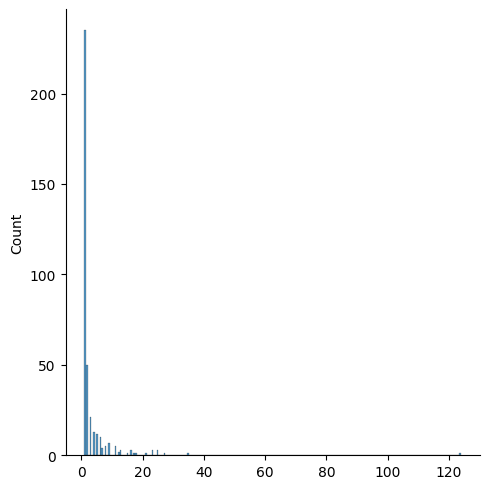

In [18]:
import seaborn as sns

sns.displot(val_table.df.num_posts.values)
## very skewed

In [19]:
task_name = "comment_scores_next_six_months"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('180 days 00:00:00')

In [20]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [21]:
train_table.df

,window_min_time,window_max_time,UserId,comment_scores
0,2009-02-02 14:24:32,2009-08-01 14:24:32,3315.0,0.0
1,2010-01-28 14:24:32,2010-07-27 14:24:32,891.0,0.0
2,2010-01-28 14:24:32,2010-07-27 14:24:32,30.0,11.0
3,2010-01-28 14:24:32,2010-07-27 14:24:32,63.0,0.0
4,2010-01-28 14:24:32,2010-07-27 14:24:32,37.0,4.0
...,...,...,...,...
10256,2013-01-12 14:24:32,2013-07-11 14:24:32,1687.0,1.0
10257,2013-01-12 14:24:32,2013-07-11 14:24:32,5843.0,1.0
10258,2013-01-12 14:24:32,2013-07-11 14:24:32,20011.0,0.0
10259,2013-01-12 14:24:32,2013-07-11 14:24:32,16312.0,0.0


/tmp/ipykernel_127302/4026762110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val_table.df.comment_scores.values)


<Axes: ylabel='Density'>

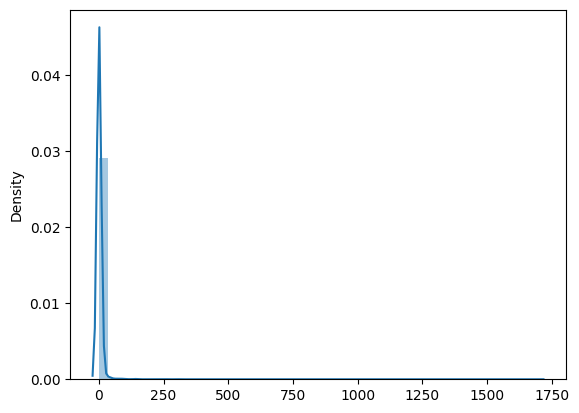

In [24]:
sns.distplot(val_table.df.comment_scores.values)